In [1]:
import csv
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import random
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error as MSLE

from sklearn.metrics import mean_absolute_error
random.seed(123)
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
path = r"C:\Users\user\Desktop\ETC"

In [2]:
acc_1_fin=pd.read_csv(path+r"/acc1_fin_dummy_and_sd.csv")
print(acc_1_fin.columns)
print(acc_1_fin.shape)

Index(['Unnamed: 0', '回堵情況', '處理時間', '總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數',
       '2-30日內死亡人數', '受傷人數',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=326)
(7242, 326)


In [4]:
acc_1_fin=acc_1_fin.drop("Unnamed: 0",axis = 1)
acc_1_fin=acc_1_fin.drop("回堵情況",axis = 1)
X1 = acc_1_fin.drop("處理時間",axis = 1)
y1 = acc_1_fin["處理時間"]

In [5]:
X1.columns

Index(['總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數',
       '事故涉及車輛數', '通報地區_北控', '通報地區_南控',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=323)

In [6]:
X1.shape

(7242, 323)

## ElasticNetCV

In [7]:
# l1_ratio:在0到1之間，代表在l1懲罰和l2懲罰之間，如果l1_ratio=1，則為lasso，是調節模型效能的一個重要指標。
# [.1, .5, .7, .9, .95, .99, 1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) # 0.2 test_size means 20%


# 選alpha(lambda)
elscv = ElasticNetCV(n_alphas=1000,l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],alphas=None , cv=10, random_state=0)
elscv.fit(X1_train, y1_train)

# train model
els = ElasticNet(alpha = elscv.alpha_ ,l1_ratio=elscv.l1_ratio_, max_iter = 50000 , tol = 0.0001 , normalize=False)
els.fit(X1_train, y1_train)

#prediction
els_pred=els.predict(X1_test)
els_pred=els_pred.flatten()


In [8]:
print(elscv.l1_ratio_)
print(elscv.alpha_)

# mae
print(mean_absolute_error(y1_test,els_pred))
# rmse
print(np.sqrt(((y1_test-els_pred)**2).sum()/1451))

1.0
0.05988786353543889
9.555365147228805
14.260224781351129


In [9]:
# 係數!=0 的個數
coef = els.coef_[els.coef_ != 0]
print(len(coef))

51


In [10]:
# 變數
els_where = np.where(els.coef_ != 0)
red = X1_train.iloc[:,list(els_where)[0]].columns

In [11]:
red

Index(['總通行量', '總平均車速', '速限', '受傷人數', '事故涉及車輛數', '通報地區_北控', '向車道_南', '通報來源_2',
       '通報來源_3', '縣市_臺中市', '縣市_臺南市', '市區鄉鎮_五股區', '市區鄉鎮_大雅區', '市區鄉鎮_橋頭區',
       '市區鄉鎮_永康區', '市區鄉鎮_蘆竹區', '當事者車種(子)_A12', '當事者車種(子)_B12', '月_2', '月_3',
       '月_4', '月_10', '月_12', '星期_6', '小時_4', '小時_7', '小時_14', '小時_16',
       '小時_17', '小時_18', '小時_20', '天候代碼_7', '天候代碼_8', '光線代碼_3', '光線代碼_4',
       '道路型態(子)_10', '事故位置(主)_3', '車道劃分設施-分向設施(主)_5', '事故類型及型態(主)_3',
       '事故類型及型態(子)_13', '當事者車種(主)_2', '當事者車種(主)_4', '當事者車種(主)_6', '肇因研判(主)_4',
       '肇因研判(主)_6', '肇因研判(子)_7', '肇因研判(子)_42', '是否為連續假日_1', '是否為假日_1',
       '是否開放路肩_1', '通報級數'],
      dtype='object')

## 係數視覺化

In [15]:
imp_coef.to_csv("elastic_acc.csv",encoding="utf_8_sig")

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


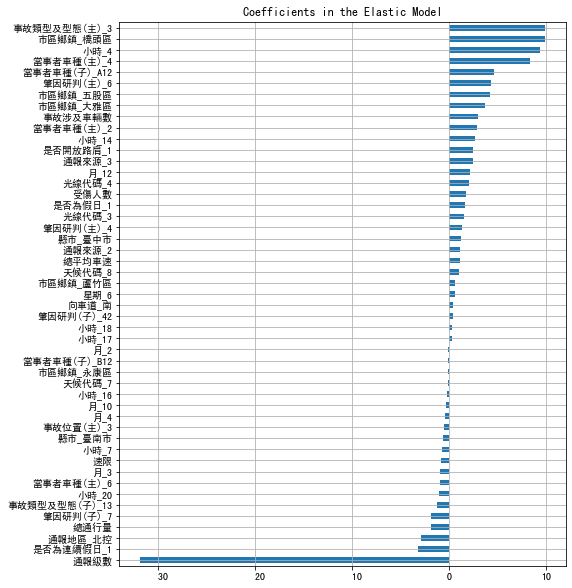

In [12]:
# 前20 後20 ()
coef = pd.Series( els.coef_, index = X1_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20), coef.sort_values().tail(29)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh",grid=True)
plt.title("Coefficients in the Elastic Model")
plt.savefig('elastic_select.png',bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


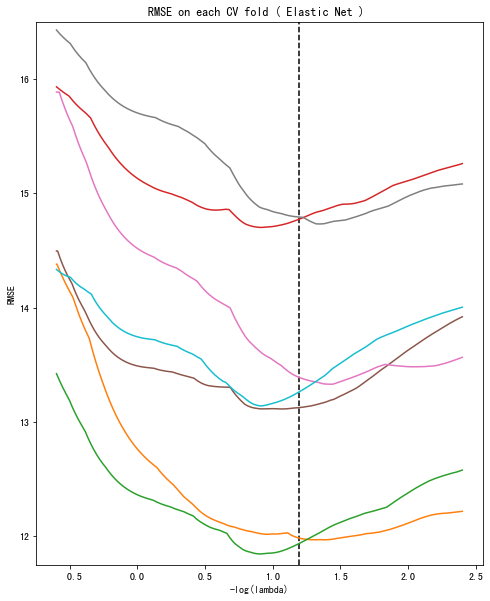

In [84]:
# Display results
m_log_alphas = -np.log10(elscv.alphas_[6])
m_log_alpha = -np.log10(elscv.alpha_)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
ymin, ymax = np.sqrt(elscv.mse_path_[6].min())-0.1,16.5
plt.plot(m_log_alphas, np.sqrt(elscv.mse_path_[6]))
plt.vlines([m_log_alpha], ymin, ymax, linestyle='dashed')


plt.xlabel('-log(lambda)')
plt.ylabel('RMSE')

plt.title('RMSE on each CV fold ( Elastic Net ) ')
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.savefig('elastic_cv.png',bbox_inches='tight')
plt.show()

In [85]:
variable_select_varname=X1.columns[np.where(els.coef_!=0)]

In [86]:
print(variable_select_varname)
print(len(variable_select_varname))

Index(['總通行量', '總平均車速', '速限', '受傷人數', '事故涉及車輛數', '通報地區_北控', '向車道_南', '通報來源_2',
       '通報來源_3', '縣市_臺中市', '縣市_臺北市', '縣市_臺南市', '市區鄉鎮_五股區', '市區鄉鎮_大雅區',
       '市區鄉鎮_橋頭區', '市區鄉鎮_蘆竹區', '當事者車種(子)_A12', '當事者車種(子)_B12', '月_2', '月_3',
       '月_4', '月_5', '月_8', '月_10', '月_12', '星期_6', '小時_4', '小時_7', '小時_14',
       '小時_17', '小時_18', '小時_20', '天候代碼_7', '天候代碼_8', '光線代碼_3', '光線代碼_4',
       '事故位置(主)_3', '事故類型及型態(主)_3', '事故類型及型態(子)_13', '當事者車種(主)_2',
       '當事者車種(主)_4', '當事者車種(主)_6', '肇因研判(主)_4', '肇因研判(主)_6', '肇因研判(子)_7',
       '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object')
49


### 用 Elastic Net 選出係數不為0的變數

In [87]:
with open(file=path+r'\variable_select_varname.lst',mode="wb") as outhis : 
                                                    
    pickle.dump(variable_select_varname, outhis)